# Problem 1

In [28]:
import pandas as pd
df = pd.read_csv('benchmarks.txt', sep=",",header=0)
df = df.loc[df['benchName']=='101.tomcatv',:]
df

,testID,benchName,base,peak
0,cpu95-19990104-03254,101.tomcatv,19.40,27.1
26,cpu95-19990118-03258,101.tomcatv,19.50,27.5
44,cpu95-19990122-03281,101.tomcatv,35.30,37.1
54,cpu95-19990122-03282,101.tomcatv,43.00,49.8
64,cpu95-19990122-03283,101.tomcatv,63.90,75.0
...,...,...,...,...
9900,p074,101.tomcatv,3.40,4.66
9910,p075,101.tomcatv,7.34,8.89
9920,p076,101.tomcatv,8.46,9.86
9930,p077,101.tomcatv,9.45,11.0


In [37]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model


# extract number of benchName col and reshape inputs
ID = list(df['testID'].values)
base = list(df['base'].values)
date = []
y = []
for x in range(len(ID)):
    if '-' in ID[x]:
        extraction = ID[x].split('-')[1]
        if len(list(extraction)) < 8:
            extraction = '19'+ extraction
        date.append(int(extraction))
        y.append(base[x])

date = np.reshape(date,(len(date),1))
y = np.reshape(np.log(y),(len(y),1))

In [30]:
date

array([[19990104],
       [19990118],
       [19990122],
       [19990122],
       [19990122],
       [19990122],
       [19990122],
       [19990122],
       [19990122],
       [19990201],
       [19990201],
       [19990201],
       [19990201],
       [19990226],
       [19990315],
       [19990315],
       [19990315],
       [19990315],
       [19990315],
       [19990315],
       [19990315],
       [19990329],
       [19990329],
       [19990329],
       [19990329],
       [19990329],
       [19990329],
       [19990329],
       [19990329],
       [19990329],
       [19990329],
       [19990329],
       [19990329],
       [19990329],
       [19990329],
       [19990330],
       [19990412],
       [19990412],
       [19990412],
       [19990412],
       [19990412],
       [19990426],
       [19990426],
       [19990503],
       [19990503],
       [19990503],
       [19990503],
       [19990503],
       [19990503],
       [19990503],
       [19990510],
       [19990512],
       [1999

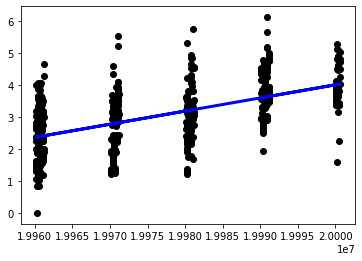

In [54]:
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(date, y)
predict = regr.predict(date)

plt.scatter(date, y,  color='black')
plt.plot(date, coef*date+intercept, color='blue', linewidth=3)

# plt.xticks(())
# plt.yticks(())


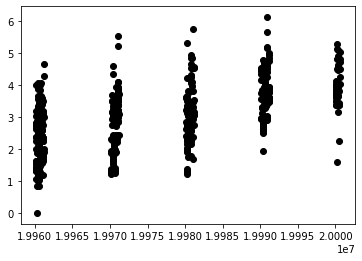

In [39]:
plt.scatter(date, y,  color='black')

# Problem 2

In [42]:
from sklearn import datasets
iris = datasets.load_iris()
digits = datasets.load_digits()


array([[ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
        15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
         0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
        16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.]])

In [23]:
from sklearn import svm
clf = svm.SVC(gamma=0.001, C=100.)
clf.fit(digits.data[:-3], digits.target[:-3]) #train the clf

SVC(C=100.0, gamma=0.001)

In [30]:
#predict the last 3 data
#note that the input must be 2-D so digits.data[-1] does not work as it is 1D
clf.predict(digits.data[-3:]) 


array([8, 9, 8])

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           3       1.00      1.00      1.00        54
           7       1.00      1.00      1.00        55

    accuracy                           1.00       109
   macro avg       1.00      1.00      1.00       109
weighted avg       1.00      1.00      1.00       109


Confusion matrix:
[[54  0]
 [ 0 55]]


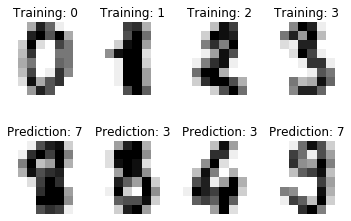

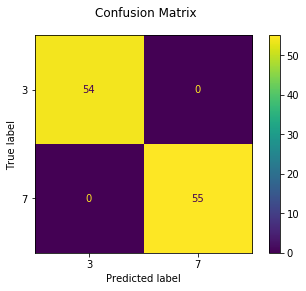

In [59]:
#K-nearest neigbor
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

# The digits dataset
digits = datasets.load_digits()

# The data that we are interested in is made of 8x8 images of digits, let's
# have a look at the first 4 images, stored in the `images` attribute of the
# dataset.  If we were working from image files, we could load them using
# matplotlib.pyplot.imread.  Note that each image must have the same size. For these
# images, we know which digit they represent: it is given in the 'target' of
# the dataset.
_, axes = plt.subplots(2, 4)
images_and_labels = list(zip(digits.images, digits.target))
for ax, (image, label) in zip(axes[0, :], images_and_labels[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:

n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
classifier = svm.SVC(gamma=0.001)

#filter 3 and 7 data

mask = [label==3 or label==7 for label in digits.target] 
X = data[mask]


# Split data into train and test subsets


y = digits.target[mask]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

# We learn the digits on the first half of the digits
classifier.fit(X_train, y_train)

# Now predict the value of the digit on the second half:
predicted = classifier.predict(X_test)

images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for ax, (image, prediction) in zip(axes[1, :], images_and_predictions[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Prediction: %i' % prediction)

print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(y_test, predicted)))
disp = metrics.plot_confusion_matrix(classifier, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)

plt.show()